In [1]:
import csv, cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
import time, random
from math import isclose

In [6]:
import csv, cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
import time, random
from math import isclose

STEER_CORRECTION = .25
FONT = 25
start = time.time()

data = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        data.append(line)

data = shuffle(data)

def load_train_data(using_custom):
    fp1 = './data/driving_log.csv'
    fp2 = './recovery_data/driving_log.csv'

    data = []
    
    fileToUpload = fp2 if using_custom else fp1
    with open(fileToUpload) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            data.append(line)

    image_paths = []
    steering_angles = []

    for img_file_label in data:    
           
        if using_custom:
            center = img_file_label[0].split('/')[-1]
            left = img_file_label[1].split('/')[-1]
            right = img_file_label[2].split('/')[-1]
        else:
            center = './data/IMG/'+ img_file_label[0].split('/')[-1]
            left = './data/IMG/'+ img_file_label[1].split('/')[-1]
            right = './data/IMG/'+ img_file_label[2].split('/')[-1]

        '''
        print(center)
        print(left)
        print(right)
        pause = input()
        '''
        
        if center == "./data/IMG/center":
            continue

        center_angle = float(img_file_label[3])
        left_angle = float(img_file_label[3]) + STEER_CORRECTION
        right_angle = float(img_file_label[3]) - STEER_CORRECTION
        
        coinFlip = random.random()
        if isclose(center_angle, 0.0):
            PROBABILITY_SKIP_ZERO_STEERING_ANGLE = .7 if using_custom else .7
            
            if coinFlip > PROBABILITY_SKIP_ZERO_STEERING_ANGLE:
                image_paths.extend( (center,left, right ) )
                steering_angles.extend( (center_angle, left_angle, right_angle) )
        else:
            image_paths.extend( (center,left, right ) )
            steering_angles.extend( (center_angle, left_angle, right_angle) )
        
    image_paths = np.array(image_paths)
    steering_angles = np.array(steering_angles)

    return image_paths, steering_angles

    
images, steering_angles = load_train_data(data)

finish = time.time()
print("It took: {} to upload, shuffle, put images to arrays".format(finish-start))

def display_two(a,b,ta,tb):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
    f.tight_layout()
    ax1.imshow(a)
    ax1.set_title(ta, fontsize=FONT)
    ax2.imshow(b)
    ax2.set_title(tb, fontsize=FONT)

It took: 0.16611647605895996 to upload, shuffle, put images to arrays


In [7]:
print(images[0])

C:\Users\Andromeda\LucasFastAI\Project3-Behavior-Cloning\CarND-Behavioral-Cloning-P3\recovery_data\IMG\center_2018_04_15_17_49_21_270.jpg


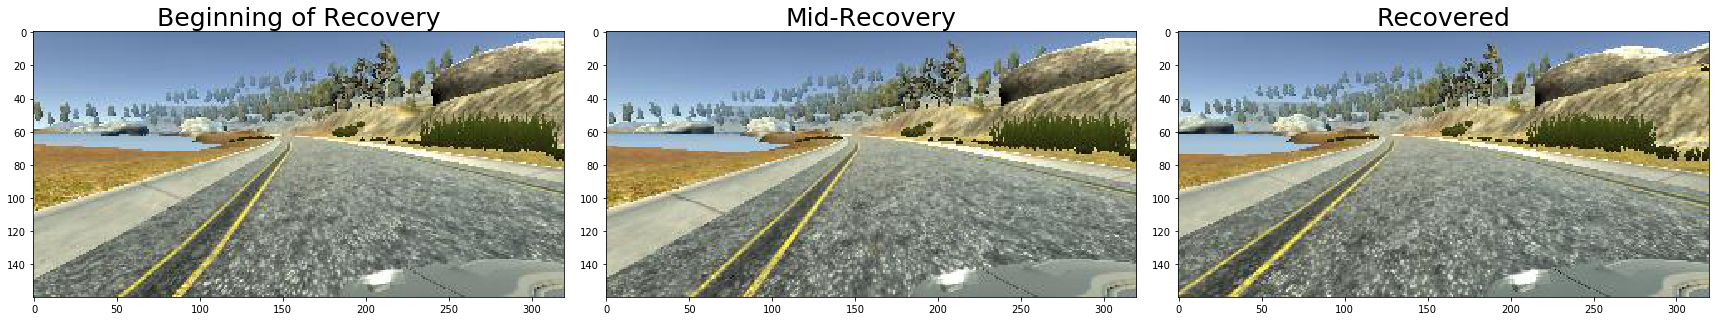

In [9]:
def display_three(a,b,c,ta,tb,tc):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
    f.tight_layout()
    ax1.imshow(a)
    ax1.set_title(ta, fontsize=FONT)
    ax2.imshow(b)
    ax2.set_title(tb, fontsize=FONT)
    ax3.imshow(c)
    ax3.set_title(tc, fontsize=FONT)
    

recov1 = cv2.cvtColor(cv2.imread("C:\\Users\\Andromeda\\LucasFastAI\\Project3-Behavior-Cloning\\CarND-Behavioral-Cloning-P3\\forsubmission\\IMG\\left_2018_04_24_22_04_11_972.jpg"), cv2.COLOR_BGR2RGB)
recov2 = cv2.cvtColor(cv2.imread("./forsubmission/IMG/left_2018_04_24_22_04_12_199.jpg"), cv2.COLOR_BGR2RGB)
recov3 = cv2.cvtColor(cv2.imread("./forsubmission/IMG/left_2018_04_24_22_04_12_647.jpg"), cv2.COLOR_BGR2RGB)

display_three(recov1,recov2,recov3,"Beginning of Recovery","Mid-Recovery","Recovered")
plt.savefig("./examples/recovery.png")